# Fare Prediction

In [121]:
# Grid Search CV for random Forest model

rf_fare = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [122]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [123]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(rf, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(x_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [124]:
test.dtypes

passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [125]:
#Apply model on test data

predictions_GRF_test = gridcv_rf.predict(test)

predictions_GRF_test

array([2.39237948, 2.42524965, 1.6779094 , ..., 3.99241091, 3.01754579,
       2.005723  ])

In [126]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2015,1,20150127,27,13,1.200946
1,1,2015,1,20150127,27,13,1.231205
2,1,2011,10,20111008,8,11,0.481579
3,1,2012,12,20121201,1,21,1.085538
4,1,2012,12,20121201,1,21,1.854312


In [127]:
test.to_csv('test.csv')

# Predict Fuel Cost and Carbon Emission

In [128]:
#  Estimate Fuel Cost 
fuel_efficiency_km_per_liter = 12
fuel_price_per_liter = 1.2

# Train Data 
train['fuel_cost'] = (train['distance'] / fuel_efficiency_km_per_liter) * fuel_price_per_liter

# Test Data
test['fuel_cost'] = (test['distance'] / fuel_efficiency_km_per_liter) * fuel_price_per_liter

In [129]:
# Estimate Carbon Emission
co2_per_liter = 2.31

# Train Data
train['carbon_emission'] = (train['distance'] / fuel_efficiency_km_per_liter) * co2_per_liter

# Test Data
test['carbon_emission'] = (test['distance'] / fuel_efficiency_km_per_liter) * co2_per_liter

In [130]:
# Set param grid

param_grid = {
    'n_estimators': list(range(50, 101, 10)),
    'max_depth': list(range(5, 16, 2))
}

# Train model for Fuel Cost
rf_fuel = RandomForestRegressor(random_state=42)
gridcv_fuel = GridSearchCV(rf_fuel, param_grid=param_grid, cv=5)
gridcv_fuel.fit(x_train, y_train)

# Predict on Test set
test['predicted_fuel_cost'] = gridcv_fuel.predict

In [139]:
# Train model for Carbon Emission
rf_co2 = RandomForestRegressor(random_state=42)
gridcv_co2 = GridSearchCV(rf_co2, param_grid=param_grid, cv=5)
gridcv_co2.fit(x_train, y_train)

# Predict on Test set
test['predicted_carbon_emission'] = gridcv_co2.predict

In [140]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance,fuel_cost,carbon_emission,predicted_fuel_cost,predicted_carbon_emission
0,1,2015,1,20150127,27,13,1.200946,0.120095,0.231182,<bound method BaseSearchCV.predict of GridSear...,<bound method BaseSearchCV.predict of GridSear...
1,1,2015,1,20150127,27,13,1.231205,0.123120,0.237007,<bound method BaseSearchCV.predict of GridSear...,<bound method BaseSearchCV.predict of GridSear...
2,1,2011,10,20111008,8,11,0.481579,0.048158,0.092704,<bound method BaseSearchCV.predict of GridSear...,<bound method BaseSearchCV.predict of GridSear...
3,1,2012,12,20121201,1,21,1.085538,0.108554,0.208966,<bound method BaseSearchCV.predict of GridSear...,<bound method BaseSearchCV.predict of GridSear...
4,1,2012,12,20121201,1,21,1.854312,0.185431,0.356955,<bound method BaseSearchCV.predict of GridSear...,<bound method BaseSearchCV.predict of GridSear...


In [141]:
test.to_csv('test_with_fuel_and_emission_predictions.csv', index=False)

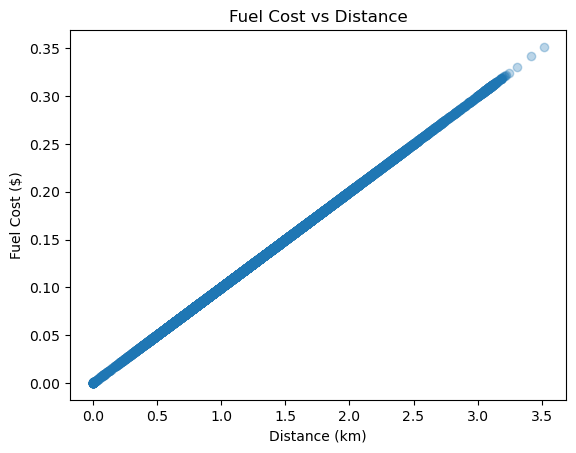

In [142]:
# Visualisation

plt.scatter(train['distance'], train['fuel_cost'], alpha=0.3)
plt.xlabel('Distance (km)')
plt.ylabel('Fuel Cost ($)')
plt.title('Fuel Cost vs Distance')
plt.show()

In [135]:
test.describe()

,passenger_count,Year,Month,Date,Day,Hour,distance,fuel_cost,carbon_emission
count,9914.000000,9914.000000,9914.000000,9.914000e+03,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,1.671273,2011.815816,6.857979,2.011886e+07,16.194170,13.467420,1.270879,0.127088,0.244644
std,1.278747,1.803347,3.353272,1.796905e+04,8.838482,6.868584,0.610763,0.061076,0.117572
min,1.000000,2009.000000,1.000000,2.009010e+07,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2010.000000,4.000000,2.010112e+07,9.000000,8.000000,0.832160,0.083216,0.160191
50%,1.000000,2012.000000,7.000000,2.012013e+07,16.000000,15.000000,1.168577,0.116858,0.224951
75%,2.000000,2014.000000,10.000000,2.014011e+07,25.000000,19.000000,1.618457,0.161846,0.311553
max,6.000000,2015.000000,12.000000,2.015063e+07,31.000000,23.000000,4.615081,0.461508,0.888403
